# Exploring the Languages and Religions of the World

In [183]:
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np

In [241]:
np.sort(px.colors.named_colorscales())

array(['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
       'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
       'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
       'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
       'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
       'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
       'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
       'orrd', 'oryel', 'peach', 'phase', 'picnic', 'pinkyl', 'piyg',
       'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn', 'puor',
       'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu', 'rdgy',
       'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar', 'spectral',
       'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn', 'tealrose',
       'tempo', 'temps', 'thermal', 'tropic', 'turbid', 'twilight',
       'viridis', 'ylgn', 'ylgnbu', 'ylorbr', 'ylorrd'], dtype='<U10')

## Data

Our dataset was constructed c. 2018 with the help of the [CIA World Factbook](https://www.cia.gov/the-world-factbook/).

In [221]:
data = pd.read_csv('world_data.csv', index_col=0)
data.sample(10)

,Country,Continent,Population,Main Language Family,Official Languages,Semi-Official Languages,Main Languages,Indo-European Languages,Sino-Tibetan Languages,Niger-Congo Languages,...,Nilo-Saharan Languages,Uralic Languages,Other Significant Languages,Percent Catholic,Percent Protestant,Percent Orthodox,Percent Muslim,Percent Hindu,Percent Buddhist,Percent Other Religions
46,Democratic Republic of the Congo,Africa,83000000.0,Indo-European,French,NaN,NaN,French,NaN,"Lingala, Swahili, Kikongo, Tshiluba",...,NaN,NaN,NaN,0.50,0.20,NaN,0.10,NaN,NaN,0.20
138,Republic of Korea,Asia,51000000.0,Koreanic,Korean,NaN,Korean,English,NaN,NaN,...,NaN,NaN,NaN,0.08,0.20,NaN,NaN,NaN,0.16,0.56
170,Thailand,Asia,68000000.0,Kra-Dai,Thai,NaN,Thai,English,Burmese,NaN,...,NaN,NaN,NaN,NaN,0.01,NaN,0.04,NaN,0.95,0.00
144,Saint Lucia,NaN,160000.0,Indo-European,English,NaN,French Creole,"English, French, French Creole",NaN,NaN,...,NaN,NaN,NaN,0.62,0.26,NaN,NaN,NaN,NaN,0.12
96,Liberia,Africa,4700000.0,Indo-European,English,NaN,NaN,English,NaN,NaN,...,NaN,NaN,NaN,0.07,0.76,NaN,0.12,NaN,NaN,0.05
29,Cambodia,Asia,16000000.0,Austroasiatic,Khmer,NaN,Khmer,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,0.97,0.01
140,Romania,Europe,22000000.0,Indo-European,Romanian,NaN,Romanian,"Romanian, Romani",NaN,NaN,...,NaN,Hungarian,NaN,0.04,0.06,0.82,NaN,NaN,NaN,0.08
37,Comoros,NaN,810000.0,Niger-Congo,"Arabic, French, Shikomoro",NaN,Shikomoro,French,NaN,Shikomoro,...,NaN,NaN,NaN,NaN,NaN,NaN,0.98,NaN,NaN,0.02
20,Bolivia,South America,11000000.0,Indo-European,"Spanish, Quechua, Aymara, Guaraní, Araona, Bau...",NaN,Spanish,Spanish,NaN,NaN,...,NaN,NaN,"Quechua, Aymara, Guaraní",0.77,0.08,NaN,NaN,NaN,NaN,0.15
125,Nigeria,Africa,190000000.0,Indo-European,English,NaN,NaN,English,NaN,"Yoruba, Igbo, Fula",...,NaN,NaN,NaN,0.19,0.21,NaN,0.50,NaN,NaN,0.10


Notice that there *are* quite a lot of nulls in our dataset.

In [207]:
data.isna().sum()

Country                          0
Continent                       45
Population                       0
Main Language Family             0
Official Languages               8
Semi-Official Languages        155
Main Languages                  26
Indo-European Languages          9
Sino-Tibetan Languages         176
Niger-Congo Languages          160
Afro-Asiatic Languages         155
Austronesian Languages         171
Dravidian Languages            188
Turkic Languages               177
Japonic Languages              189
Austro-Asiatic Languages       189
Tai-Kadai Languages            192
Koreanic Languages             190
Nilo-Saharan Languages         186
Uralic Languages               181
Other Significant Languages    163
Percent Catholic                45
Percent Protestant              63
Percent Orthodox               147
Percent Muslim                  77
Percent Hindu                  171
Percent Buddhist               170
Percent Other Religions          0
dtype: int64

## Exploratory Data Analysis

Our main activity here will be to draw some plots and maps to get a better handle on our data! But first let's create some subframes that it will be handy to have around.

### Continent Groups

In [222]:
data['Continent'].value_counts(dropna=False)

Africa           47
NaN              45
Europe           38
Asia             34
South America    12
North America    10
Europe, Asia      5
Africa, Asia      1
Australia         1
Name: Continent, dtype: int64

Our `plotly` package won't let us use a column to color if it's got nulls, so let's replace them.

In [224]:
continents = data.copy()
continents['Continent'] = continents['Continent'].fillna('Other')

In [225]:
px.choropleth(locations=continents['Country'],
              scope='world',
              color=continents['Continent'],
              locationmode='country names',
              width=900,
              height=400)

Notice that countries not connected by land to continental masses have nulls for their `Continent` value. Also, three countries have two continents listed: Turkey and Russia are both Europe and Asia. Egypt is both Africa and Asia.

#### Continental Subframes

In [226]:
asia = data[(data['Continent'] == 'Asia') | (data['Continent'] == 'Europe, Asia') |\
           (data['Continent'] == 'Africa, Asia')]

europe = data[(data['Continent'] == 'Europe') | (data['Continent'] == 'Europe, Asia')]

na = data[data['Continent'] == 'North America']

sa = data[data['Continent'] == 'South America']

africa = data[data['Continent'] == 'Africa']

non_continental = data[data['Continent'].isna()]

### Main Language Families

In [227]:
px.choropleth(locations=data['Country'],
              scope='world',
              color=data['Main Language Family'],
              locationmode='country names',
              width=900,
              height=500)
plt.savefig()

In [243]:
px.choropleth(locations=asia['Country'],
              scope='world',
              color=asia['Main Language Family'],
              locationmode='country names',
              title='Asian Language Families',
              width=900,
              height=500)

### Religions

In [244]:
px.choropleth(locations=asia['Country'],
              scope='world',
              color=asia['Percent Muslim'],
              locationmode='country names',
              color_continuous_scale='darkmint',
              title='Asian Countries by Pct Muslim',
              width=900,
              height=500)

In [245]:
px.choropleth(locations=data['Country'],
              scope='world',
              color=data['Percent Muslim'],
              locationmode='country names',
              color_continuous_scale='darkmint',
              title='World Countries by Pct Muslim',
              width=900,
              height=500)

In [246]:
px.choropleth(locations=data['Country'],
              scope='world',
              color=data['Percent Catholic'],
              locationmode='country names',
              color_continuous_scale='darkmint',
              title='World Countries by Pct Catholic',
              width=900,
              height=500)

In [247]:
px.choropleth(locations=europe['Country'],
              scope='world',
              color=europe['Percent Catholic'],
              locationmode='country names',
              color_continuous_scale='icefire',
              title='European Countries by Pct Catholic',
              width=900,
              height=500)

In [177]:
aa = data[~data['Afro-Asiatic Languages'].isna()]

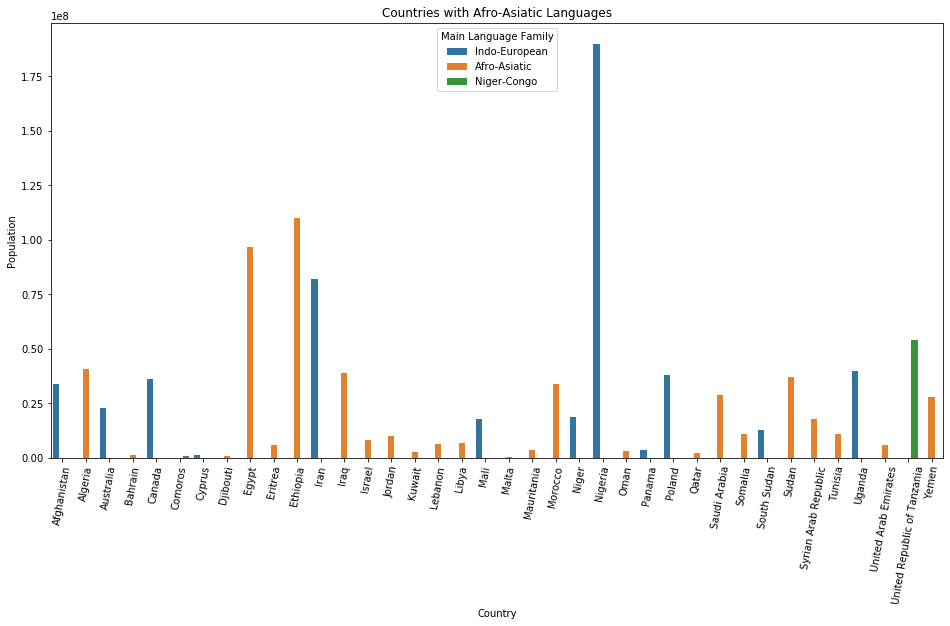

In [269]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(data=aa, y='Population', x='Country',
            hue='Main Language Family', ax=ax)
plt.xticks(rotation=80)
plt.title('Countries with Afro-Asiatic Languages');

Tanzania is the only country that predominantly has Niger-Congo languages (mainly Swahili) but also has a significant presence of Afro-Asiatic languages (mainly Arabic).

In [206]:
aa[aa['Country'] == 'United Republic of Tanzania'][['Main Language Family',
                                                    'Afro-Asiatic Languages',
                                                   'Niger-Congo Languages']]

,Main Language Family,Afro-Asiatic Languages,Niger-Congo Languages
183,Niger-Congo,Arabic,Swahili


In [252]:
offs = data[~data['Official Languages'].isna()]

arabic = offs[offs['Official Languages'].str.contains('Arabic')]

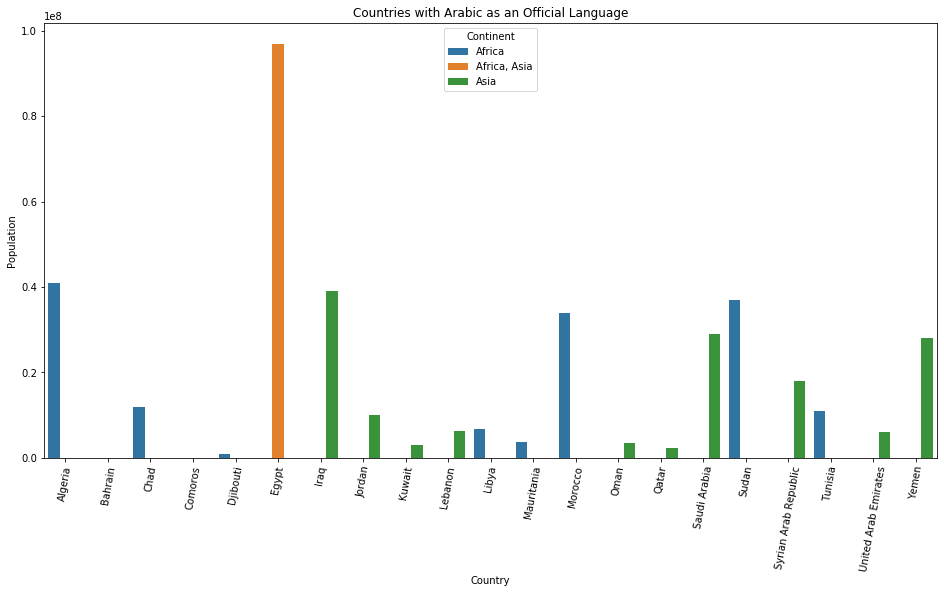

In [270]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(data=arabic, y='Population', x='Country', hue='Continent', ax=ax)
plt.xticks(rotation=80)
plt.title('Countries with Arabic as an Official Language');

In [289]:
austronesia = data[~data['Austronesian Languages'].isna()].copy()

In [290]:
austronesia['Continent'] = austronesia['Continent'].fillna('Island')

In [306]:
cutoff = 2e6
austronesia_high = austronesia[austronesia['Population'] > cutoff]
austronesia_low = austronesia[austronesia['Population'] <= cutoff]

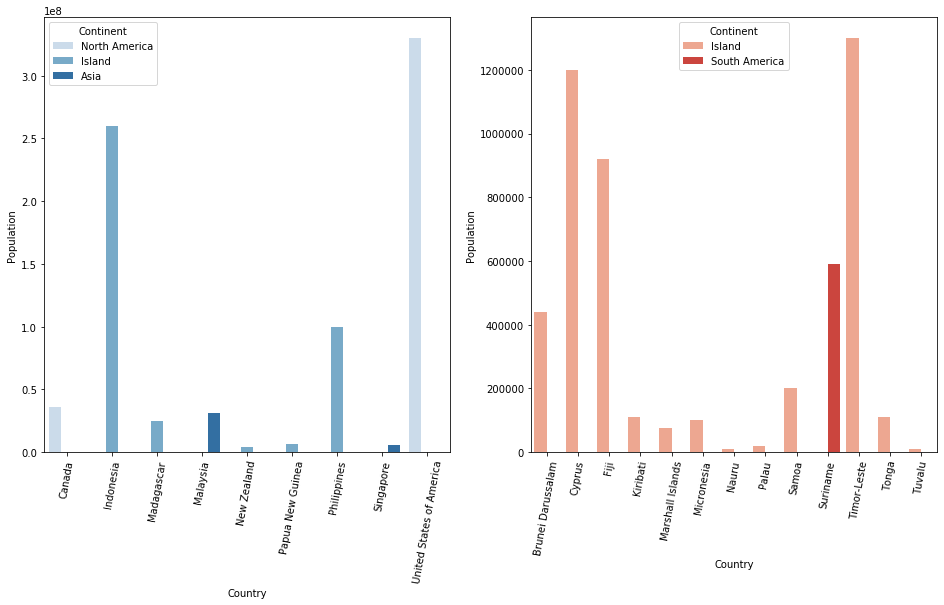

In [358]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(data=austronesia_high, y='Population', x='Country',
            hue='Continent', ax=ax[0], palette='Blues')
ax[0].tick_params(rotation=80, axis='x')

sns.barplot(data=austronesia_low, y='Population', x='Country',
           hue='Continent', ax=ax[1], palette='Reds')
ax[1].tick_params(rotation=80, axis='x')

In [313]:
dravidian = data[~data['Dravidian Languages'].isna()].copy()

In [324]:
px.choropleth(locations=dravidian['Country'],
              scope='world',
              data_frame=dravidian,
              color=dravidian['Dravidian Languages'],
              hover_data=['Population'],
              locationmode='country names',
              color_continuous_scale='icefire',
              title='Countries with Dravidian Languages',
              width=900,
              height=500)

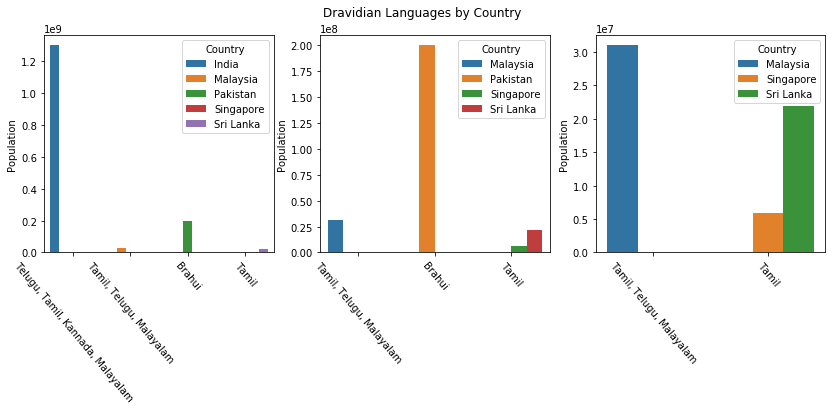

In [386]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
sns.barplot(data=dravidian, y='Population',
            x='Dravidian Languages', hue='Country', ax=axes[0])
axes[0].tick_params(rotation=-50, axis='x')
axes[0].set_xlabel('')
sns.barplot(data=dravidian[dravidian['Country'] != 'India'], y='Population',
            x='Dravidian Languages', hue='Country', ax=axes[1])
axes[1].tick_params(rotation=-50, axis='x')
axes[1].set_xlabel('')
sns.barplot(data=dravidian[(dravidian['Country'] != 'India') &\
                          (dravidian['Country'] != 'Pakistan')], y='Population',
            x='Dravidian Languages', hue='Country', ax=axes[2])
axes[2].tick_params(rotation=-50, axis='x')
axes[2].set_xlabel('')
plt.suptitle('Dravidian Languages by Country');

### French Official

In [374]:
french = offs[offs['Official Languages'].str.contains('French')].copy()

px.choropleth(locations=french['Country'],
              scope='world',
              color=french['Population'],
              locationmode='country names',
              color_continuous_scale='reds',
              title='Countries with French as an Official Language',
              width=900,
              height=500)

### Spanish Official

In [378]:
spanish = offs[offs['Official Languages'].str.contains('Spanish')].copy()

px.choropleth(locations=spanish['Country'],
              scope='world',
              color=spanish['Population'],
              locationmode='country names',
              color_continuous_scale='greens',
              title='Countries with Spanish as an Official Language',
              width=900,
              height=500)

### English Official

In [385]:
english = offs[offs['Official Languages'].str.contains('English')].copy()

px.choropleth(locations=english['Country'],
              scope='world',
              color=english['Population'],
              locationmode='country names',
              color_continuous_scale='greens',
              title='Countries with English as an Official Language',
              width=900,
              height=500)